In [60]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import csv
import os
import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

In [2]:
from IPython.display import display, HTML

CSS = """
div.cell:nth-child(18) .output {
    flex-direction: row;
}
"""

HTML('<style>{}</style>'.format(CSS))

In [3]:
dd_dict_file = os.path.join(os.pardir, "data", "pc_latlon_dd.csv")
parti_file = os.path.join(os.pardir, "data", "DS1_Intern_20170101.csv")
mrt_file = os.path.join(os.pardir, "data", "mrt_2016.csv")

In [4]:
dd_dict_df = pd.read_csv(dd_dict_file, dtype={'postalcode': 'str'})
parti_df = pd.read_csv(parti_file, dtype={'PostalCode': 'str'})
print(type(parti_df['PostalCode'].dtype))
print(type(parti_df['PostalCode'][0]))
print(len(dd_dict_df))
dd_dict_df['geocoding_failed'] = dd_dict_df['homelat'].isnull()
dd_dict_df.loc[dd_dict_df['geocoding_failed'] == True]

<class 'numpy.dtype'>
<class 'str'>
27127


,postalcode,homelat,homelon,nearest_stn,stn_lat,stn_lon,directdist,geocoding_failed
108,450497,NaN,NaN,NaN,NaN,NaN,NaN,True
143,90114,NaN,NaN,NaN,NaN,NaN,NaN,True
145,610653,NaN,NaN,NaN,NaN,NaN,NaN,True
172,802133,NaN,NaN,NaN,NaN,NaN,NaN,True
249,80102,NaN,NaN,NaN,NaN,NaN,NaN,True
318,554316,NaN,NaN,NaN,NaN,NaN,NaN,True
370,90030,NaN,NaN,NaN,NaN,NaN,NaN,True
527,80012,NaN,NaN,NaN,NaN,NaN,NaN,True
528,50538,NaN,NaN,NaN,NaN,NaN,NaN,True
535,39190,NaN,NaN,NaN,NaN,NaN,NaN,True


The dictionary of postal codes to latlons and directdists has a length of 27,127, and for some reason the data type of the column is dtype even though I defined it as string when loading it... oh well, the values inside seem to be str.

Out of 27127 unique postal codes extracted from participant data, 1748(6.44%) were unrecognized by OneMap's API.

In [5]:
print(dd_dict_df.head())
dd_dict_df.directdist.describe()

  postalcode   homelat     homelon               nearest_stn   stn_lat  \
0     400336  1.325720  103.901822         EUNOS MRT STATION  1.319779   
1     546183  1.362425  103.876521         KOVAN MRT STATION  1.360179   
2     578345  1.374031  103.832481  YIO CHU KANG MRT STATION  1.381756   
3     650420  1.362550  103.745771  BUKIT GOMBAK MRT STATION  1.358762   
4     460059  1.324544  103.920616     KEMBANGAN MRT STATION  1.321038   

      stn_lon  directdist geocoding_failed  
0  103.903252       0.679            False  
1  103.885065       0.981            False  
2  103.844947       1.629            False  
3  103.751894       0.800            False  
4  103.912949       0.937            False  


C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


count    25379.000000
mean         0.831766
std          0.541250
min          0.010000
25%               NaN
50%               NaN
75%               NaN
max          7.926000
Name: directdist, dtype: float64

First few entries and summary stats of the directdist. Percentile calculation broke for some reason, perhaps because a good number of them are null?

In [6]:
#relevent working participant information
wparti_df = parti_df[['EncNRIC', 'PostalCode']]
wparti_df['postalcode'] = wparti_df.loc[:,('PostalCode')]
wparti_df.drop(('PostalCode'), axis=1, inplace=True)
print(len(wparti_df))
wparti_df['nric_isnull'] = wparti_df['EncNRIC'].isnull()
print(wparti_df.loc[wparti_df['nric_isnull'] == True])

#postal code, latlon, directdist
pclldd_df = pd.merge(wparti_df, dd_dict_df, how='left', on='postalcode', sort=False)
print(pclldd_df.head(20))
pclldd_df['nric_isnull'] = pclldd_df['EncNRIC'].isnull()
print(pclldd_df.loc[pclldd_df['nric_isnull'] == True])  #confirming that all postal codes had an EncNRIC

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


339121
Empty DataFrame
Columns: [EncNRIC, postalcode, nric_isnull]
Index: []
                     EncNRIC postalcode nric_isnull   homelat     homelon  \
0   +++dRFewDCP35Ewg/Hxs0A==     400336       False  1.325720  103.901822   
1   ++/KfZFlfVuQNZJvDuDafQ==     546183       False  1.362425  103.876521   
2   ++08DjepMTLJ7yMy6b8tOg==     578345       False  1.374031  103.832481   
3   ++0kjCLiS480sqIsQ/3GwA==     650420       False  1.362550  103.745771   
4   ++0znnPR1z8lmQnhF2Sfpg==     460059       False  1.324544  103.920616   
5   ++1dnjM5j+FxGDv67NkzHQ==        NaN       False       NaN         NaN   
6   ++2O1MJu2/uGAYpnA6IXBA==     466507       False  1.315781  103.941424   
7   ++2b52HGYQoZWfUx5UARJA==     357984       False  1.346568  103.868524   
8   ++5VrZG2Zt+rwgJFqv3V3Q==     760776       False  1.422559  103.833944   
9   ++5mkKs7u+tkcSHgaBGIZQ==     560129       False  1.369895  103.842059   
10  ++8m2GXucH+pHlYEHpoXSw==     732685       False  1.441333  103.806136   

In this cell I extract just the EncNRIC as an identifier, and the postalcode for matching each participant to the latlons and directdists. This is stored in a working participant dataframe, wparti_df. 

I want to double check that the dataframe resulting from mapping the latlons and directdists doesn't give me any null EncNRICs, so I check that there are none before mapping, and after mapping. There are none in both cases, as shown by the empty resultant dataframes.

The errors being thrown are with regard to use of .loc slicing when copying, instead of simply assigning is like:

`wparti_df['postalcode'] = wparti_df['PostalCode]`

and also from using the .drop function. I already used their prescibed method for copying columns... so I'm just going to ignore the errors, they don't affect the output. Errors in pink are warnings, vs errors with a white background which are exceptions.

In [7]:
pclldd_df['latlon_isnull'] = pclldd_df['homelat'].isnull()
invalid_rows_df = pclldd_df.loc[pclldd_df['latlon_isnull'] == True]
print(invalid_rows_df)

                         EncNRIC postalcode nric_isnull  homelat  homelon  \
5       ++1dnjM5j+FxGDv67NkzHQ==        NaN       False      NaN      NaN   
27      ++IF56BhjROKN9+o7EBzkA==        NaN       False      NaN      NaN   
31      ++Liyn3wJVCfZ4JYPTULXA==        NaN       False      NaN      NaN   
38      ++Qol8FSnaLVY2j0BSBfzg==        NaN       False      NaN      NaN   
49      ++X6llTnrVRYlK0QIp5bvA==        NaN       False      NaN      NaN   
52      ++YKHjbkWLXxTNsT17+/Aw==        NaN       False      NaN      NaN   
68      ++mVDnx/irx6ZX1WjRPZsQ==        NaN       False      NaN      NaN   
81      +/+8qI2sYizxWbkE7CVOUg==        NaN       False      NaN      NaN   
89      +/7qzlPHHfzHcY7ZQDkWiQ==        NaN       False      NaN      NaN   
97      +/GjKAkZipTJt5DVUaPE0g==     320100       False      NaN      NaN   
105     +/N91z9+i7xC2dnlx+uqnQ==        NaN       False      NaN      NaN   
107     +/NgSqcuLdpgOJFn+PSZtg==        NaN       False      NaN      NaN   

Here I'm trying to see how many, and which participants I failed to map a latlon and directdist to. 

Out of 339121 participants, 38994(11.50%) participants' home locations could not be determined, either because they didn't fill in a postal code, or the postal code they filled in was unrecognized by OneMap's API. Oh well, not too bad.

In [8]:
#valid rows of pclldd for analysis
vpclldd_df = pclldd_df.loc[pclldd_df['latlon_isnull'] == False]

count    300127.000000
mean          0.697488
std           0.460534
min           0.010000
25%           0.355000
50%           0.604000
75%           0.930000
max           7.926000
Name: directdist, dtype: float64


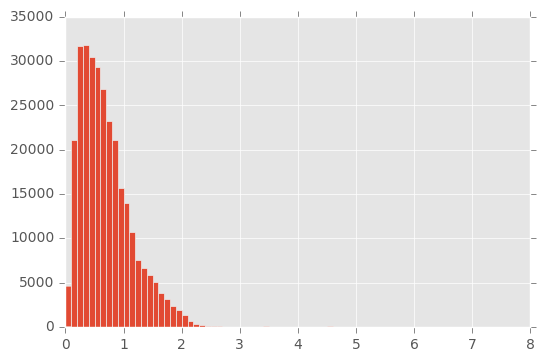

In [9]:
print(vpclldd_df['directdist'].describe())
vpclldd_df['directdist'].hist(bins=np.arange(0,8,0.1))
plt.show()

Distribution of participants by their distance to nearest MRT/LRT station. As the histogram shows, the majority live within 1km of their closest station.

In [10]:
stns = vpclldd_df['nearest_stn'].unique()
print(type(stns))
print(stns)
# print(str(len(vpclldd_df['nearest_stn'].unique())) + ' unique stations, out of 184 operational stations(including LRTs).')

<class 'numpy.ndarray'>
['EUNOS MRT STATION' 'KOVAN MRT STATION' 'YIO CHU KANG MRT STATION'
 'BUKIT GOMBAK MRT STATION' 'KEMBANGAN MRT STATION'
 'TANAH MERAH MRT STATION' 'SERANGOON MRT STATION' 'KHATIB MRT STATION'
 'ANG MO KIO MRT STATION' 'ADMIRALTY MRT STATION' 'HILLVIEW MRT STATION'
 'WOODLANDS MRT STATION' 'BOON KENG MRT STATION' 'KANGKAR LRT STATION'
 'YEW TEE MRT STATION' 'YISHUN MRT STATION' 'LAKESIDE MRT STATION'
 'LAYAR LRT STATION' 'PUNGGOL MRT STATION' 'RUMBIA LRT STATION'
 'BAKAU LRT STATION' 'BUKIT PANJANG MRT STATION' 'PASIR RIS MRT STATION'
 'TOA PAYOH MRT STATION' 'BUONA VISTA MRT STATION'
 'TIONG BAHRU MRT STATION' 'CHOA CHU KANG MRT STATION'
 'CALDECOTT MRT STATION' 'COMPASSVALE LRT STATION' 'FAJAR LRT STATION'
 'FERNVALE LRT STATION' 'CHENG LIM LRT STATION' 'PIONEER MRT STATION'
 'PAYA LEBAR MRT STATION' 'MERIDIAN LRT STATION' 'HOUGANG MRT STATION'
 'REDHILL MRT STATION' 'TAMPINES MRT STATION' 'CASHEW MRT STATION'
 'MARYMOUNT MRT STATION' 'FARRER PARK MRT STATION'


134 unique stations, out of 183 operational stations(including LRTs), were represented. 

Before I look more closely at the distribution over stations, let's break down the participants into the three categories: less than 400m from nearest MRT station, more than 1km away, and those in between. To do that, let's first take a look at the MRT stations in question.

In [11]:
mrt_df = pd.read_csv(mrt_file)

183


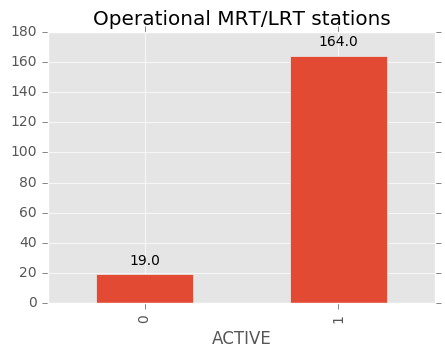

In [12]:
print(len(mrt_df))
ax = mrt_df['ACTIVE'].groupby([mrt_df['ACTIVE']]).count().sort_values().plot(kind='bar', figsize=(5,3.5), title='Operational MRT/LRT stations')
for p in ax.patches:
    ax.annotate(np.round(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

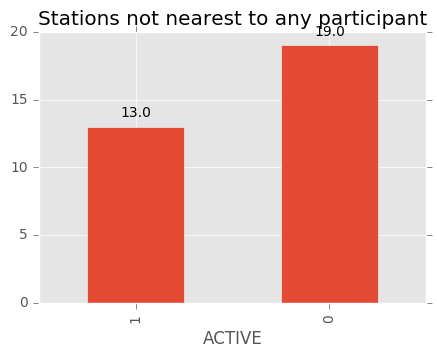

In [13]:
inverse_stns = mrt_df[~mrt_df.STN_NAME.isin(stns)]
# print(len(inverse_stns))
# print(inverse_stns.loc[inverse_stns['ACTIVE'] == 1])
ax = inverse_stns['ACTIVE'].groupby([inverse_stns['ACTIVE']]).count().sort_values().plot(kind='bar', figsize=(5,3.5), title='Stations not nearest to any participant')
for p in ax.patches:
    ax.annotate(np.round(p.get_height()), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')
plt.show()

The 19 non-operational MRT stations(upcoming downtown line stations, mostly) were not used to calculate the nearest MRT station to participants.

Apart from those 19, we can see that there are 13 operational stations besides, which were not the nearest MRT/LRT station to any of the participants:

In [14]:
print(inverse_stns['STN_NAME'].loc[inverse_stns['ACTIVE'] == 1])

42               SAM KEE LRT STATION
74              TECK LEE LRT STATION
92          HARBOURFRONT MRT STATION
93             PROMENADE MRT STATION
98         TANJONG PAGAR MRT STATION
106             BAYFRONT MRT STATION
114             DOWNTOWN MRT STATION
119           MARINA BAY MRT STATION
120           MARINA BAY MRT STATION
141    MARINA SOUTH PIER MRT STATION
175            PROMENADE MRT STATION
177        RAFFLES PLACE MRT STATION
181           TELOK AYER MRT STATION
Name: STN_NAME, dtype: object


Unsurprisingly, they are mostly in the downtown area.

Now, let's categorize the participants according to their distance from their nearest station.

In [15]:
def dist_bin(dist):
    if dist < 0.4:
        return '< 0.4'
    elif dist > 1.0:
        return '> 1.0'
    else:
        return '0.4 - 1.0'

In [16]:
vpclldd_df['distbin'] = vpclldd_df['directdist'].apply(lambda x: dist_bin(x))
vpclldd_df.head(20)

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,EncNRIC,postalcode,nric_isnull,homelat,homelon,nearest_stn,stn_lat,stn_lon,directdist,geocoding_failed,latlon_isnull,distbin
0,+++dRFewDCP35Ewg/Hxs0A==,400336,False,1.325720,103.901822,EUNOS MRT STATION,1.319779,103.903252,0.679,False,False,0.4 - 1.0
1,++/KfZFlfVuQNZJvDuDafQ==,546183,False,1.362425,103.876521,KOVAN MRT STATION,1.360179,103.885065,0.981,False,False,0.4 - 1.0
2,++08DjepMTLJ7yMy6b8tOg==,578345,False,1.374031,103.832481,YIO CHU KANG MRT STATION,1.381756,103.844947,1.629,False,False,> 1.0
3,++0kjCLiS480sqIsQ/3GwA==,650420,False,1.362550,103.745771,BUKIT GOMBAK MRT STATION,1.358762,103.751894,0.800,False,False,0.4 - 1.0
4,++0znnPR1z8lmQnhF2Sfpg==,460059,False,1.324544,103.920616,KEMBANGAN MRT STATION,1.321038,103.912949,0.937,False,False,0.4 - 1.0
6,++2O1MJu2/uGAYpnA6IXBA==,466507,False,1.315781,103.941424,TANAH MERAH MRT STATION,1.327187,103.946346,1.380,False,False,> 1.0
7,++2b52HGYQoZWfUx5UARJA==,357984,False,1.346568,103.868524,SERANGOON MRT STATION,1.350595,103.872368,0.619,False,False,0.4 - 1.0
8,++5VrZG2Zt+rwgJFqv3V3Q==,760776,False,1.422559,103.833944,KHATIB MRT STATION,1.417383,103.832980,0.585,False,False,0.4 - 1.0
9,++5mkKs7u+tkcSHgaBGIZQ==,560129,False,1.369895,103.842059,ANG MO KIO MRT STATION,1.369933,103.849558,0.833,False,False,0.4 - 1.0
10,++8m2GXucH+pHlYEHpoXSw==,732685,False,1.441333,103.806136,ADMIRALTY MRT STATION,1.440585,103.800988,0.578,False,False,0.4 - 1.0


Now it's time to group the participants to see which stations they're closest to.

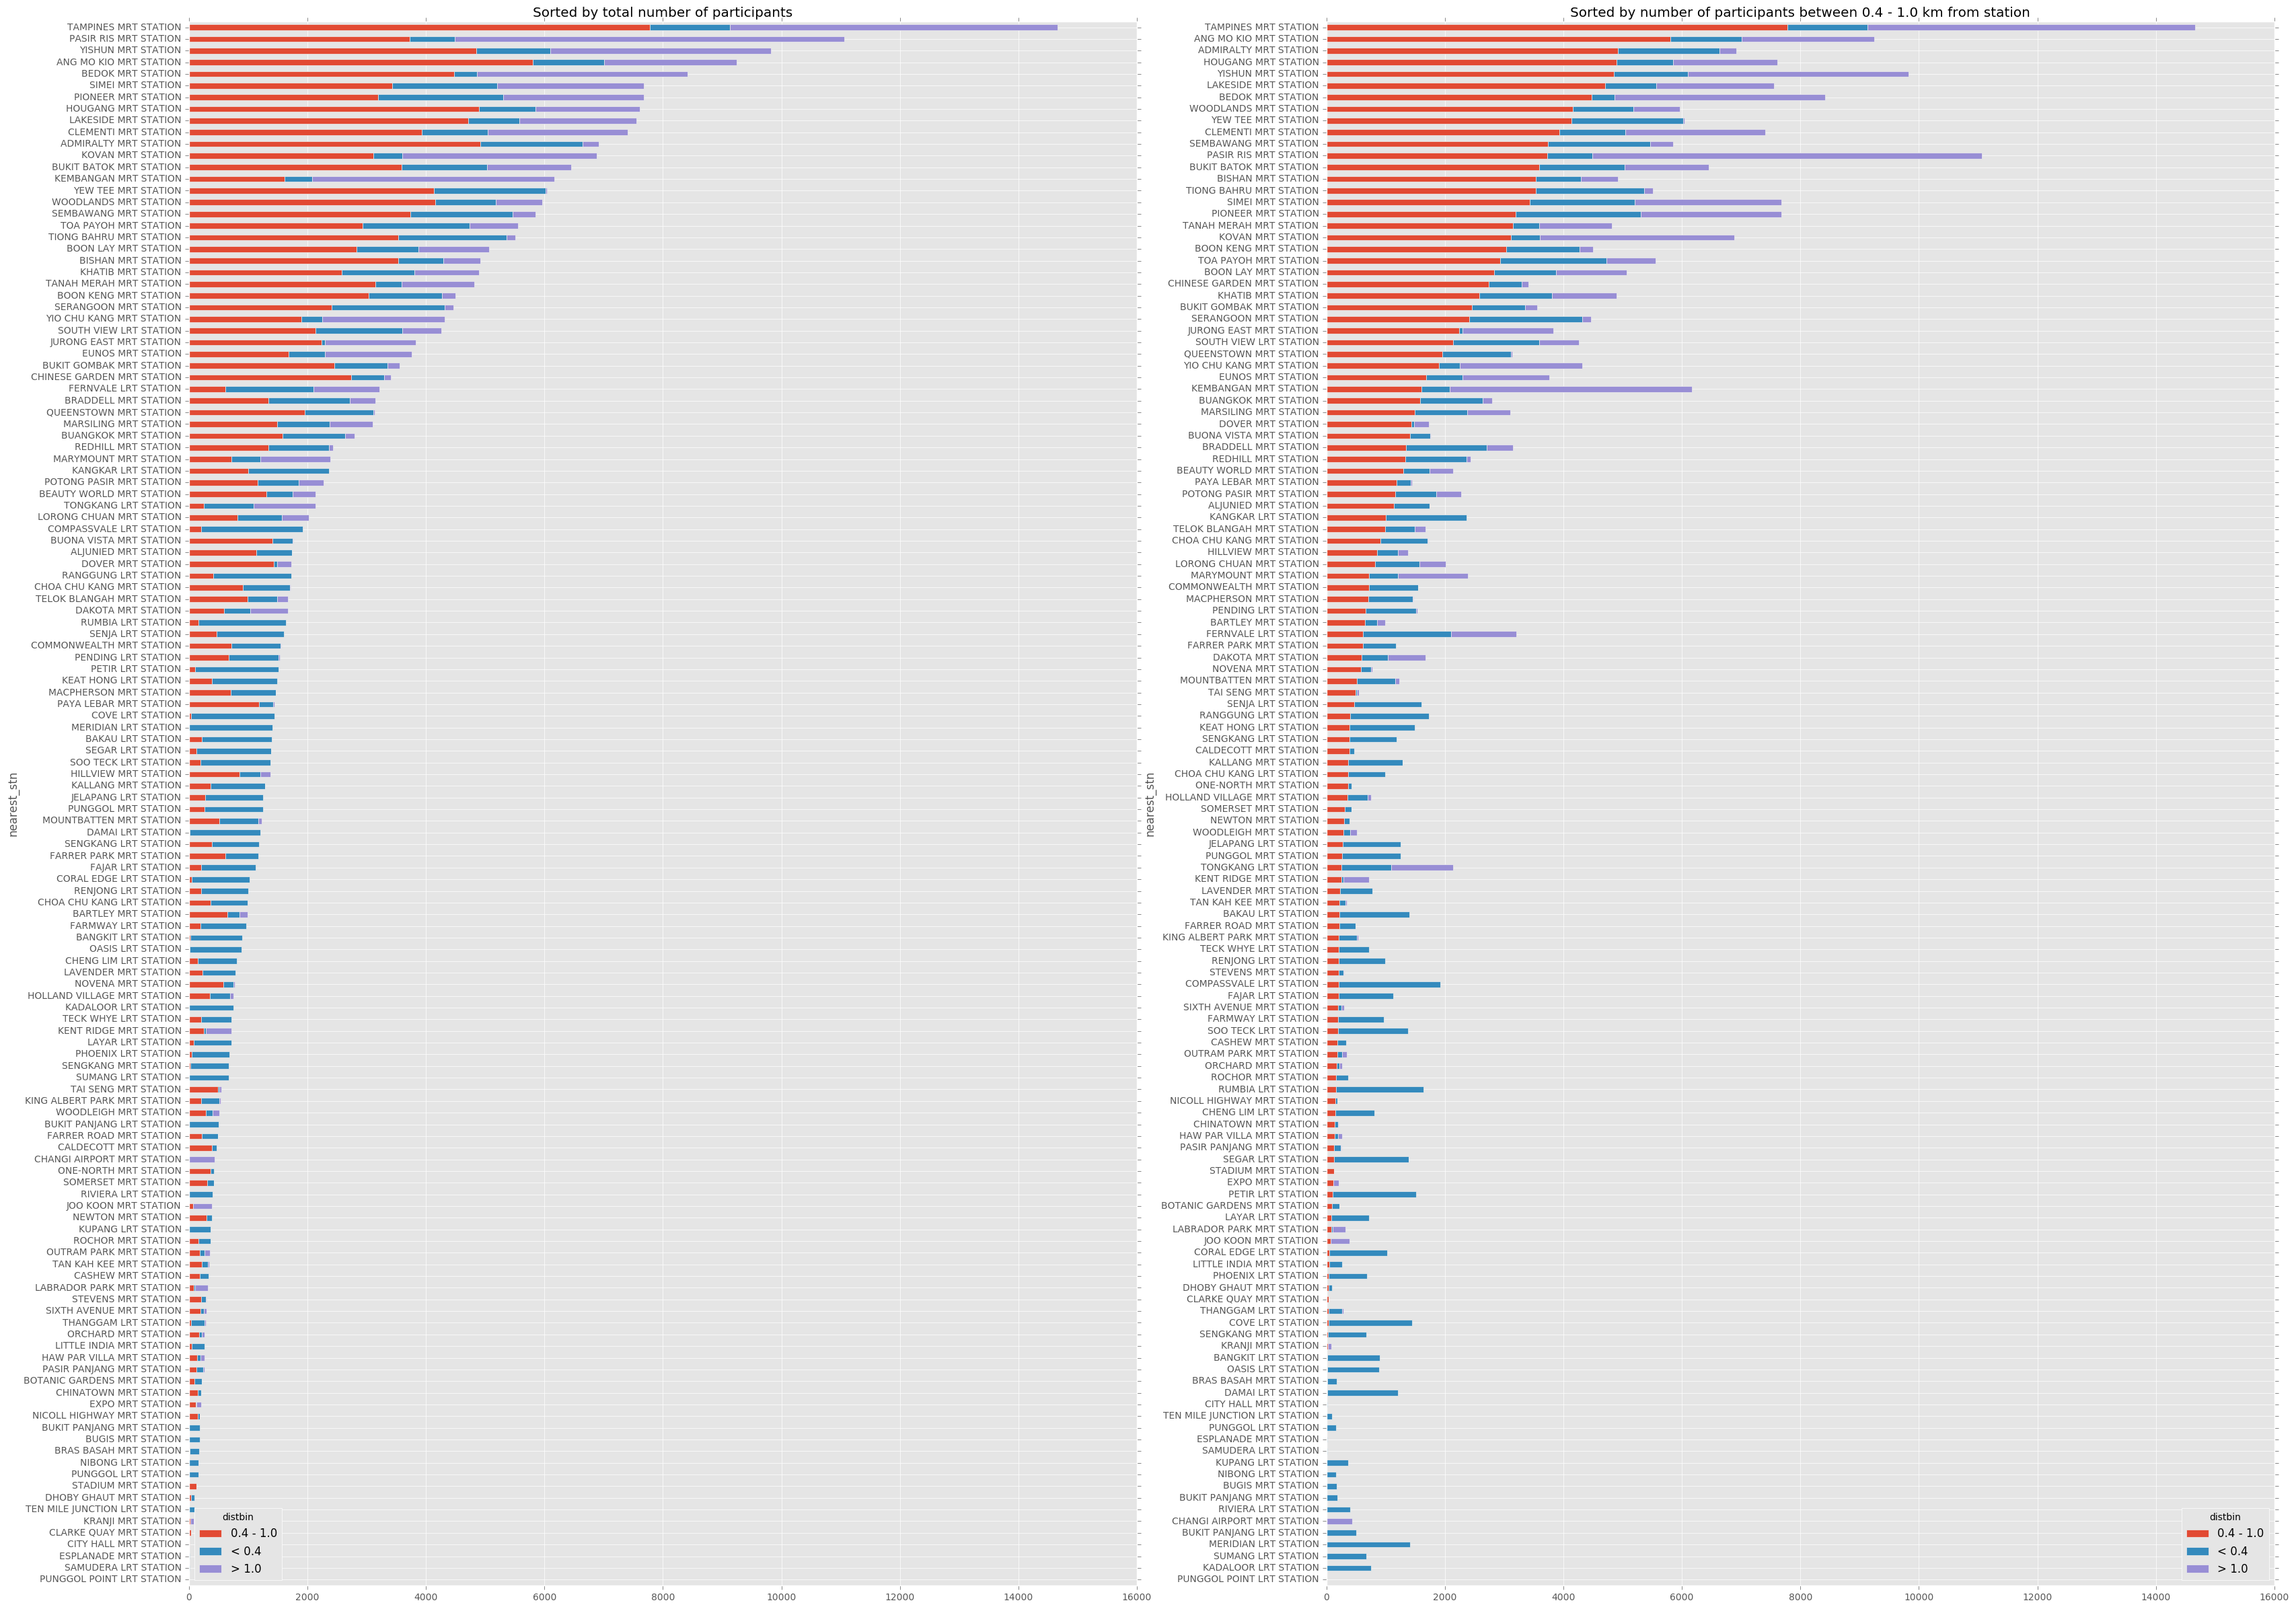

In [17]:
fig, axs = plt.subplots(1,2)

#sorted by total number of participants
stn_by_total_count_df = vpclldd_df.groupby(['nearest_stn'])['nearest_stn'].count().sort_values(ascending=True)

stn_by_dist_df = vpclldd_df.groupby(['nearest_stn', 'distbin'])['nearest_stn'].count().sort_values(ascending=True)
stackstn_by_dist_df = stn_by_dist_df.unstack('distbin').fillna(0).reindex(index=stn_by_total_count_df.index)
stackstn_by_dist_df.plot(kind='barh', stacked=True, figsize=(40,30), ax=axs[0])
axs[0].title.set_text('Sorted by total number of participants')

stackstn_by_intermediate_dist_df  = stackstn_by_dist_df.sort_values(by='0.4 - 1.0', ascending=True)
stackstn_by_intermediate_dist_df.plot(kind='barh', stacked=True, figsize=(40,30), ax=axs[1])
axs[1].title.set_text('Sorted by number of participants between 0.4 - 1.0 km from station')

plt.show()

Bar chart showing participant count by their nearest mrt station. Right click and open image in a new tab to see it in full size. 

The chart on the left is sorted by total number of participants near each station, while the one on the right is sorted by the number of participants between 0.4 - 1.0 km from their nearest station, as represented by the red secment of the stacked bars. 

Slicing and sorting the data in a more readable way would be more easily accomplished in a tool like Tableau, so I'll leave this analysis at this point.

We can map something similar to these two graphs to understand which areas have greater potential for increased participation. First, we'd plot the participants with distance to MRT/LRT station between 0.4 - 1.0 km by geographic region, then divide that by the census data for that region to get a sense of the proportion of residents who participate in NSC2. In order to do this, it's important to select geographical boundaries for which we have census data.

In [68]:
geocensus_file = os.path.join(os.pardir, "data", "MTI_census_2016.geojson")

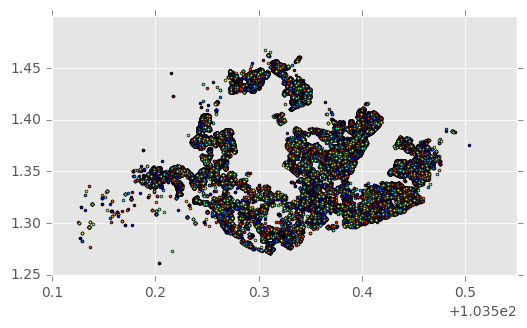

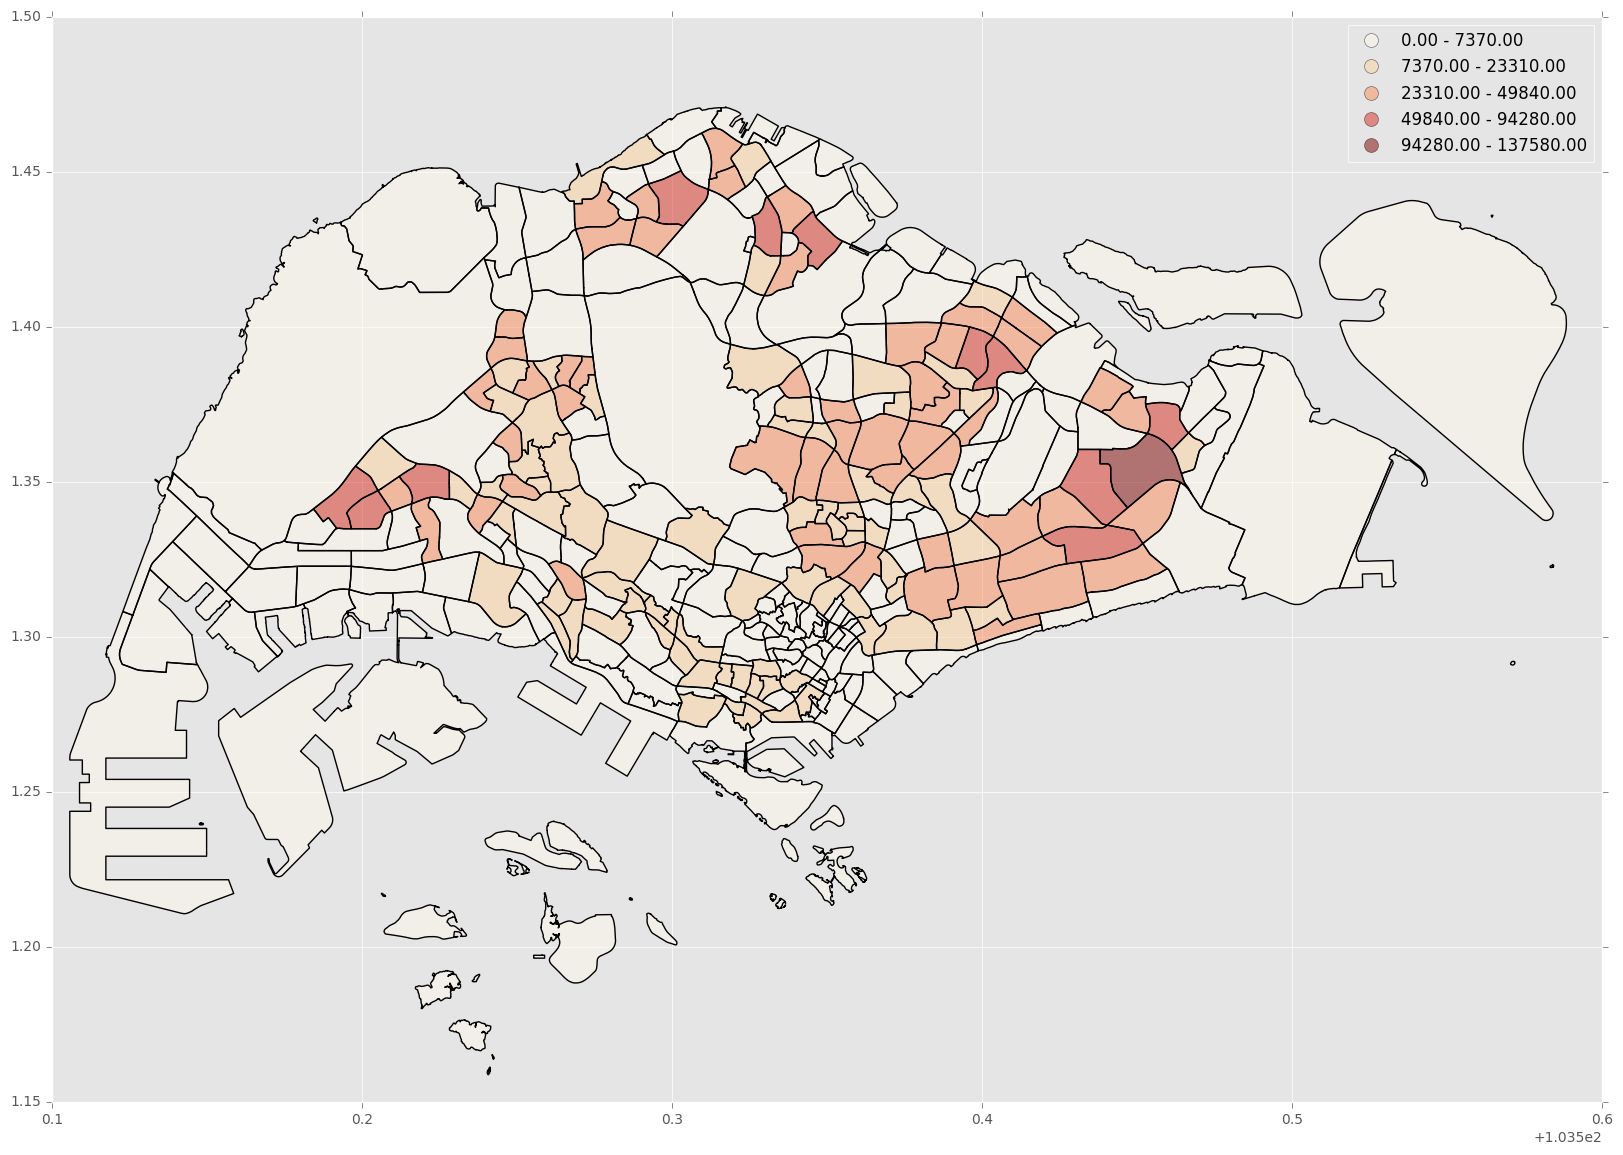

In [69]:
geocensus_gdf = gpd.read_file(geocensus_file)
ax = geocensus_gdf.plot(column="TOTAL", cmap='OrRd', figsize=(20,14), scheme='Fisher_Jenks', legend=True)
fig = plt.show()

This is a basic heat map of Singapore's residential population, based on the Ministry of Trade and Industry's 2016 census data. We can see immediately that the Tampines/Pasir Ris region is much more heavily populated than the rest of the island.

In [87]:
parti_geometry = [Point(xy) for xy in zip(vpclldd_df.homelon, vpclldd_df.homelat)]
parti_gdf = gpd.GeoDataFrame(vpclldd_df, crs={'init': 'epsg:4326'}, geometry=parti_geometry)
wparti_gdf = parti_gdf[['EncNRIC', 'distbin', 'geometry']]
wparti_gdf

,EncNRIC,distbin,geometry
0,+++dRFewDCP35Ewg/Hxs0A==,0.4 - 1.0,POINT (103.9018224 1.325720203)
1,++/KfZFlfVuQNZJvDuDafQ==,0.4 - 1.0,POINT (103.8765208 1.362425051)
2,++08DjepMTLJ7yMy6b8tOg==,> 1.0,POINT (103.8324805 1.374031357)
3,++0kjCLiS480sqIsQ/3GwA==,0.4 - 1.0,POINT (103.7457708 1.36255043)
4,++0znnPR1z8lmQnhF2Sfpg==,0.4 - 1.0,POINT (103.9206161 1.324544162)
6,++2O1MJu2/uGAYpnA6IXBA==,> 1.0,POINT (103.9414245 1.315781481)
7,++2b52HGYQoZWfUx5UARJA==,0.4 - 1.0,POINT (103.8685241 1.346568182)
8,++5VrZG2Zt+rwgJFqv3V3Q==,0.4 - 1.0,POINT (103.8339441 1.422559348)
9,++5mkKs7u+tkcSHgaBGIZQ==,0.4 - 1.0,POINT (103.8420591 1.369894989)
10,++8m2GXucH+pHlYEHpoXSw==,0.4 - 1.0,POINT (103.8061362 1.441333428)


Here we've converted the (valid postal codes + latlons + directdist) of participants into a geopandas dataframe, so that it can interact with the geopandas dataframe containing the census data, in what we call a spatial join. We'll also pull out just the distance bin category for each participant into a geodataframe for us to work with. I'm also going to do something similar to the geocensus GeoPandas DataFrame in the cell below.

In [88]:
geocensus_gdf = geocensus_gdf[['PLN_AREA_N', 'SUBZONE_N', 'TOTAL', 'geometry']]
geocensus_gdf

,PLN_AREA_N,SUBZONE_N,TOTAL,geometry
0,OUTRAM,PEOPLE'S PARK,330.0,(POLYGON ((103.8431937162421 1.284328389411803...
1,BUKIT MERAH,BUKIT MERAH,1150.0,(POLYGON ((103.8220876771419 1.280494489593267...
2,OUTRAM,CHINATOWN,11550.0,(POLYGON ((103.8437524275467 1.285079381739787...
3,DOWNTOWN CORE,PHILLIP,0.0,(POLYGON ((103.8496190494575 1.284119120671727...
4,DOWNTOWN CORE,RAFFLES PLACE,60.0,(POLYGON ((103.8525272809205 1.286165686174613...
5,OUTRAM,CHINA SQUARE,1530.0,(POLYGON ((103.8485887402583 1.282316766729342...
6,BUKIT MERAH,TIONG BAHRU,12830.0,(POLYGON ((103.8310546094715 1.287163260506726...
7,DOWNTOWN CORE,BAYFRONT SUBZONE,0.0,(POLYGON ((103.8588808156329 1.278738667748894...
8,BUKIT MERAH,TIONG BAHRU STATION,16340.0,(POLYGON ((103.8283230444262 1.287234872329738...
9,DOWNTOWN CORE,CLIFFORD PIER,0.0,"(POLYGON ((103.855213569956 1.283220073961034,..."


In [94]:
%%time
zoned_wparti_gdf = gpd.sjoin(geocensus_gdf, wparti_gdf, how="inner", op='intersects')

Wall time: 34 s


In [96]:
len(zoned_wparti_gdf)
zoned_wparti_gdf

,PLN_AREA_N,SUBZONE_N,TOTAL,geometry,index_right,EncNRIC,distbin
1,BUKIT MERAH,BUKIT MERAH,1150.0,(POLYGON ((103.8220876771419 1.280494489593267...,300970,soyIKcgixKHo7p2IVGqcSg==,0.4 - 1.0
1,BUKIT MERAH,BUKIT MERAH,1150.0,(POLYGON ((103.8220876771419 1.280494489593267...,162322,Sj26yviqsW6l4l/nBH+HFw==,0.4 - 1.0
1,BUKIT MERAH,BUKIT MERAH,1150.0,(POLYGON ((103.8220876771419 1.280494489593267...,102853,HQ19IDFJrczrk2Bga99vyQ==,0.4 - 1.0
1,BUKIT MERAH,BUKIT MERAH,1150.0,(POLYGON ((103.8220876771419 1.280494489593267...,69167,B4gjvJw+gKMOMZppMLo6Fw==,0.4 - 1.0
1,BUKIT MERAH,BUKIT MERAH,1150.0,(POLYGON ((103.8220876771419 1.280494489593267...,129563,MVw4yPuzLil5y7vTRubLBA==,0.4 - 1.0
1,BUKIT MERAH,BUKIT MERAH,1150.0,(POLYGON ((103.8220876771419 1.280494489593267...,12222,0HA6kfpz6aw/LpLAj5PFxw==,0.4 - 1.0
1,BUKIT MERAH,BUKIT MERAH,1150.0,(POLYGON ((103.8220876771419 1.280494489593267...,80367,DA7XEGf9hmv03fubSW+0yQ==,0.4 - 1.0
1,BUKIT MERAH,BUKIT MERAH,1150.0,(POLYGON ((103.8220876771419 1.280494489593267...,89579,EtwG2LQLncyuE+lOSTjQLg==,0.4 - 1.0
1,BUKIT MERAH,BUKIT MERAH,1150.0,(POLYGON ((103.8220876771419 1.280494489593267...,149238,QEPj2J3HdGBhP0vzWXkSHw==,0.4 - 1.0
1,BUKIT MERAH,BUKIT MERAH,1150.0,(POLYGON ((103.8220876771419 1.280494489593267...,52555,7wWBloWTOUSokrNoFMPRbg==,0.4 - 1.0


Now that we have the subzone of every participant, it's just a matter of grouping by the subzone to get a count of participants in each one. From there, we move on to plot the chloropleth map just like we did with the plain census data.

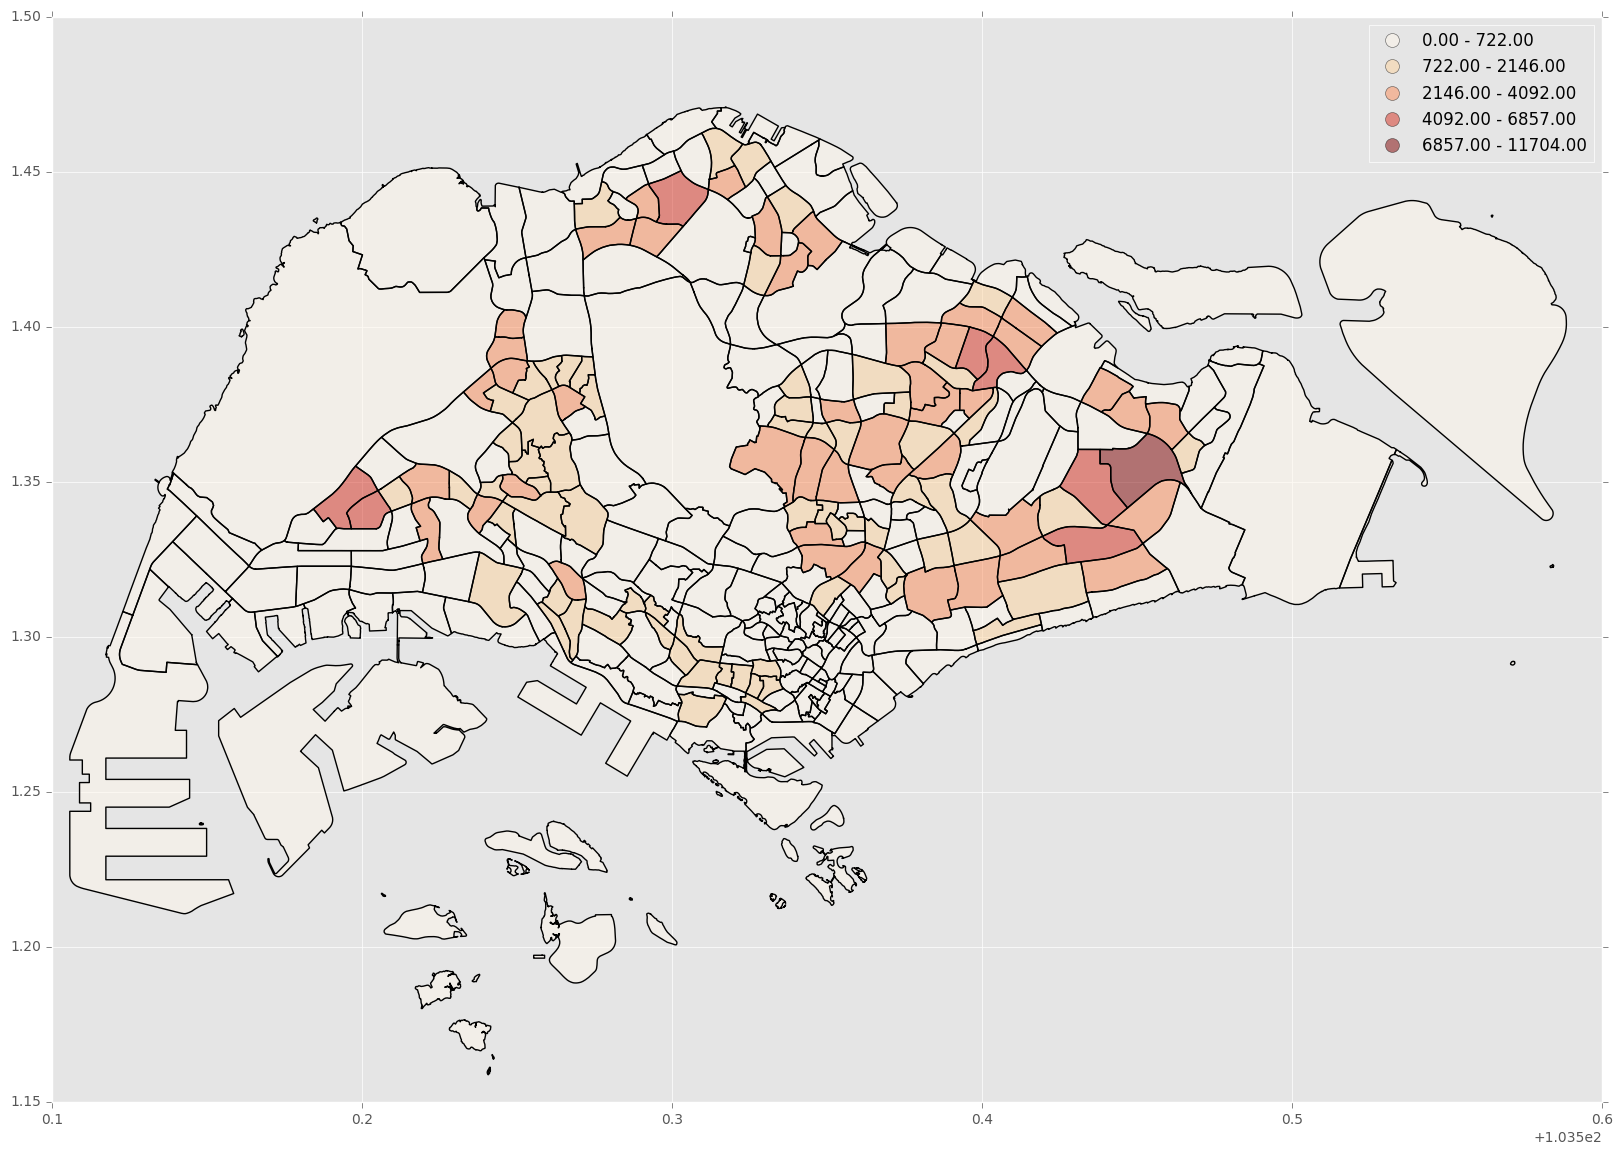

In [116]:
subzone_count_df = zoned_wparti_gdf.groupby(['SUBZONE_N']).count().reset_index()
subzone_count_df = subzone_count_df.iloc[:,:2]
subzone_count_df.rename(columns = {'PLN_AREA_N':'parti_count'}, inplace = True)
subzone_count_df

subzone_count_gdf = pd.merge(geocensus_gdf, subzone_count_df, how='left', on='SUBZONE_N', sort=False).fillna(0)

ax = subzone_count_gdf.plot(column="parti_count", cmap='OrRd', figsize=(20,14), scheme='Fisher_Jenks', legend=True)
fig = plt.show()

Comparing this plot to the census plot, it's not really obvious where we should be targetting yet. All we can see is that participation in NSC2 is more evenly spread out from the dense residential centers than the population. 

Possible reasons could be that people living further from the dense residential centers have more interest in the program, or that the success of public engagement hits a ceiling per geographical area regardless of density.